#   `lab08`—Modeling Radioactive Decay

# Objectives

-   Solve a system involving multiple simultaneous equations.
-   Utilize NumPy's random number generation to simulate a random system.
-   There are x questions in this lab

Double-click here to fill in your name and **studentIDs** here:  ☐李瑞琦, Li Ruiqi, 3180111638, ruiqi.18@intl.zju.edu.cn

In [1]:
# Import basic libraries.
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams[ 'figure.figsize' ] = (15,3)

In today's lab, we will examine how populations of radioactive materials can be modeled and represented mathematically.  We begin with a two-element system and evolve to a more sophisticated way of handling many elements in a decay chain.

##  Radioactive Decay of a Single Element

Famously, radioactive materials decaying with a characteristic time, called the _half-life_.  At time $t=t_{1/2}$, one-half of the original material remains; at time $t=2t_{1/2}$, one-quarter remains, and so forth.

The half-life has units of time (typically seconds) and is easy to tabulate.  However, many engineers prefer to work with the _decay constant_ instead, as it has a straightforward application in the governing equations of nuclear decay.  The decay constant is related to the half-life by the formula
$$
\lambda = \frac{\log(2)}{t_{1/2}}
$$
where $\log$ is the natural logarithm.

-   Compose a function `L_decay` which returns the value of the decay constant $\lambda$ given as parameter the half-life $t_{1/2}$.

In [5]:
#############################################################
############### Q1 (5 marks) ################################
#############################################################
# Compose your function `L_decay` here.
def L_decay(t0):
    return np.log(2)/t0

In [6]:
# You may test your function here if desired.


In [7]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
assert isclose( L_decay( 1.5 ),math.log( 2 )/1.5 )
print( 'Success!' )

Success!


Next we consider a particular decay chain containing only two elements, a _parent_ and a _daughter_.  Polonium-210 decays to lead-206 by emitting an alpha particle with a half-life of 138.376 days.

In order to model the population of $^{210}$Po at any given time, we can use a simple exponential decay function:

$$
N_{\text{Po}}(t) = {N_{\text{Po}}}_{0} \exp\left( -\lambda t \right) \text{,}
$$

where $N_{\text{Po}}(t)$ denotes the amount of $^{210}$Po remaining at time $t$ from an initial stock ${N_{\text{Po}}}_{0} = 1$ (assume that we begin our simulation with 1 kilogram of $^{210}$Po and no $^{206}$Pb present).

**Compose a function `N_Po( t )`, for $N_{\text{Po}}(t)$, which accepts an argument `t` denoting time elapsed in seconds, and returns `N`, the amount of $^{210}$Po remaining.**

In [8]:
#############################################################
############### Q2 (5 marks) ################################
#############################################################
# Compose your function `L_decay` here.
def N_Po(t):
    return np.exp(-L_decay(138.376*24*3600)*t)

In [9]:
# You may test your function here if desired.


In [10]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
assert isclose( N_Po( 0 ),1.0 )
if isclose( N_Po( 138.376 ),0.5 ):
    print( 'Make sure to use seconds, not days.' )
    raise AssertionError
assert isclose( N_Po( 11955686.4 ),0.5 )
print('Success!')

Success!


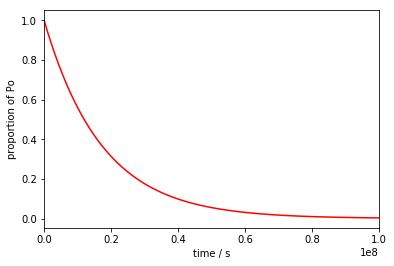

(1001,)

In [11]:
# Visualize the resulting change in population.
times = np.linspace( 0,1e8,1001 )
atoms = N_Po( times )
plt.plot( times,atoms,'r-' )
plt.xlim( ( min( times ),max( times ) ) )
plt.ylabel( 'proportion of Po' )
plt.xlabel( 'time / s' )
plt.show()
np.sum( atoms )
atoms.shape

##  Radioactive Decay of Two Elements

What happens if we simulate a three-element system:  that is, one in which the daughter of the first element also decays?

Consider the system of thorium-232.  $^{232}$Th is stable but can be used as nuclear fuel when it is _activated_ by a neutron to become $^{233}$Th.  $^{233}$Th then beta decays via $^{233}$Pa to yield $^{233}$U, an excellent nuclear fuel, but with a sufficiently long half-life that we will treat it as the stable decay product.  Assuming only $^{233}$Th to be present at first, we model the two-step reaction:

$$
\begin{align}
N_{\text{Th}}(t) & = {N_{\text{Th}}}_{0} \exp\left( -\lambda_{\text{Th}} t \right) \\
N_{\text{Pa}}(t) & = \frac{\lambda_{\text{Th}}}{\lambda_{\text{Pa}} - \lambda_{\text{Th}}} {N_{\text{Th}}}_{0} \left( \exp\left( -\lambda_{\text{Th}} t \right) - \exp\left( -\lambda_{\text{Pa}} t \right) \right) \\
N_{\text{U}}(t)  & = 1 - {N_{\text{Th}}}( t ) - {N_{\text{Pa}}}( t )
\end{align}
$$

where $N_{\text{X}}(t)$ denotes the amount of species X remaining at time $t$ from an initial stock ${N_{\text{Th}}}_{0} = 1$.

| Species | Half-Life |
| ------- | --------- |
| $^{233}$Th | 21.83 minutes |
| $^{233}$Pa | 26.975 days |
| $^{233}$U  | "stable" (stable for our purposes) |

Assume that we begin our simulation with 1 kilogram of $^{210}$Po and no $^{206}$Pb present.??????????????????????????????

**Compose the following functions:**

- `N_Th( t )`, for $N_{\text{Th}}(t)$, which accepts an argument `t` denoting time elapsed in seconds, and returns `N`, the amount of $^{233}$Th remaining.
- `N_Pa( t )`, for $N_{\text{Pa}}(t)$, which accepts an argument `t` denoting time elapsed in seconds, and returns `N`, the amount of $^{233}$Pa remaining.
- `N_U( t )`, for $N_{\text{U}}(t)$, which accepts an argument `t` denoting time elapsed in seconds, and returns `N`, the amount of $^{233}$U remaining.

In [12]:
#############################################################
############### Q3 (15 marks) ###############################
#############################################################
# Compose your functions here.
def N_Th(t):
    return np.exp(-L_decay(21.83*60)*t)
def N_Pa(t):
    return (np.exp(-L_decay(21.83*60)*t)-np.exp(-L_decay(26.975*24*3600)*t))*L_decay(21.83*60)/(L_decay(26.975*24*3600)-L_decay(21.83*60))
def N_U(t):
    return 1-N_Th(t)-N_Pa(t)


In [13]:
# You may test your function here if desired.


In [14]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
assert isclose( N_Th( 0 ),1.0 )
assert isclose( N_Th( 21.83*60 ),0.5 )
print('Success!')

Success!


In [15]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
assert isclose( N_Pa( 0 ),0.0 )
assert isclose( N_Pa( 26.975*24*60*60 ),0.5,rtol=1e-3 )
print('Success!')

Success!


In [16]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
assert isclose( N_U( 0 ),0.0 )
assert isclose( N_U( 21.83*60 ),1-N_Th( 21.83*60 )-N_Pa( 21.83*60 ),rtol=1e-3 )
print('Success!')

Success!


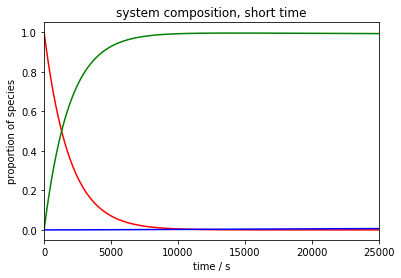

In [17]:
# Visualize the resulting change in population.
times = np.linspace( 0,25000,1001 )
atoms_Th = N_Th( times )
atoms_Pa = N_Pa( times )
atoms_U  = N_U( times )
plt.plot( times,atoms_Th,'r-' )
plt.plot( times,atoms_Pa,'g-' )
plt.plot( times,atoms_U, 'b-' )
plt.xlim( ( min( times ),max( times ) ) )
plt.ylabel( 'proportion of species' )
plt.xlabel( 'time / s' )
plt.title( 'system composition, short time' )
plt.show()

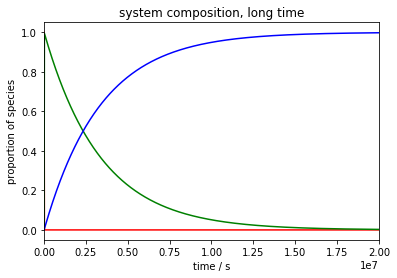

In [18]:
# Visualize the resulting change in population.
times = np.linspace( 0,2e7,1001 )
atoms_Th = N_Th( times )
atoms_Pa = N_Pa( times )
atoms_U  = N_U( times )
plt.plot( times,atoms_Th,'r-' )
plt.plot( times,atoms_Pa,'g-' )
plt.plot( times,atoms_U, 'b-' )
plt.xlim( ( min( times ),max( times ) ) )
plt.ylabel( 'proportion of species' )
plt.xlabel( 'time / s' )
plt.title( 'system composition, long time' )
plt.show()

In the above case, you can see that the $^{233}$Th rather quickly converts to $^{233}$Pa, which then takes much longer to convert to $^{233}$U.  (`1e7` s is about three months.)

##  Radioactive Decay of a System

The next system we will examine will involve a longer decay chain:  the actinide series.

Consider the following four-element chain:

$^{222}$Rn $\xrightarrow{\alpha}$ $^{218}$Po $\xrightarrow{\alpha}$ $^{214}$Pb $\xrightarrow{\beta^{-}}$ $^{214}$Bi

For more elements than three, it rapidly becomes cumbersome to derive and express the relations in terms of analytical equations, and we switch to a numerical representation—our old friend, the finite difference equation.

We need to model a balance equation for each species:

$$
\begin{align}
\frac{d N_{\text{X}}}{dt} & = \text{gain} - \text{loss} \\
\frac{d N_{\text{X}}}{dt} & = \left[ \sum_\text{sources} \right] - \left[ \sum_\text{decays} \right] \\
\frac{\Delta N_{\text{X}}}{\Delta t} & = \left[ \lambda_{\text{W}} N_{\text{W}} \right] - \left[ \lambda_{\text{X}} N_{\text{X}} \right]
\end{align}
$$

assuming the decay chain W→X→Y.

>The trickiest part here is that for numerical stability, the $\Delta t$ should be small with respect to the _smallest_ half-life $t_{1/2}$.  This means that finite-difference equations are not appropriate for modeling systems with half-lives spanning several orders of magnitude, and other methods must be use.  We will stick to a "safe" system which has been hand-picked to be stable for our chosen $\Delta t$.

Our finite-difference equations become, after some algebra:

$$
\begin{align}
\Delta N_{\text{Rn}} & =                                                   & -\Delta t \lambda_{\text{Rn}} \Delta N_{\text{Rn}} \\
\Delta N_{\text{Po}} & = \Delta t \lambda_{\text{Rn}} \Delta N_{\text{Rn}} & - \Delta t \lambda_{\text{Po}} \Delta N_{\text{Po}} \\
\Delta N_{\text{Pb}} & = \Delta t \lambda_{\text{Po}} \Delta N_{\text{Po}} & - \Delta t \lambda_{\text{Pb}} \Delta N_{\text{Pb}} \\
\Delta N_{\text{Bi}} & = \Delta t \lambda_{\text{Pb}} \Delta N_{\text{Pb}} &  
\end{align}
$$

$$
\left(
\begin{matrix}
\Delta N_{\text{Rn}} \\
\Delta N_{\text{Po}} \\
\Delta N_{\text{Pb}} \\
\Delta N_{\text{Bi}}
\end{matrix}
\right)
=
\left(
\begin{matrix}
-\Delta t \lambda_{\text{Rn}} &0.0  &0.0  &0.0 \\
\Delta t \lambda_{\text{Rn}} &-\Delta t \lambda_{\text{Po}}  &0.0  &0.0\\
0.0 &\Delta t \lambda_{\text{Po}} &-\Delta t \lambda_{\text{Pb}} &0.0\\
0.0 &0.0 &\Delta t \lambda_{\text{Pb}} &0.0
\end{matrix}
\right)
\left(
\begin{matrix}
\Delta N_{\text{Rn}} \\
\Delta N_{\text{Po}} \\
\Delta N_{\text{Pb}} \\
\Delta N_{\text{Bi}}
\end{matrix}
\right)
$$

$$
\left(
\begin{matrix}
\Delta N_{\text{Rn}} \\
\Delta N_{\text{Po}} \\
\Delta N_{\text{Pb}} \\
\Delta N_{\text{Bi}}
\end{matrix}
\right)
=
A
\left(
\begin{matrix}
\Delta N_{\text{Rn}} \\
\Delta N_{\text{Po}} \\
\Delta N_{\text{Pb}} \\
\Delta N_{\text{Bi}}
\end{matrix}
\right)
$$

(Bismuth isn't really a true termination point for this chain, but this is enough for us to implement right now.)

**Compose a function `delta_N` which accepts an argument `dt` which represents $\Delta t$ and a vector of species populations `N` and returns the expected differential change in the respective species in `N`.**

| Species | Half-Life  |
| ------- | ---------- |
| Rn      | 3.82 day   |
| Po      | 3.1 min    |
| Pb      | 26.8 min   |
| Bi      | irrelevant |

In [19]:
#############################################################
############### Q4 (45 marks) ###############################
#############################################################
def delta_N( dt,N ):
    # use L_decay to fill these in.  Make sure to convert units.
    lambda_Rn = L_decay(3.82*24*3600)
    lambda_Po = L_decay(3.1*60)
    lambda_Pb = L_decay(26.8*60)
    
    # Construct a matrix to carry out the equations.
    # Fill in the elements for Matrix A
    A = np.zeros( ( 4,4 ) )
    A[ 0,0 ] = - dt * lambda_Rn
    A[ 1,0 ] = dt * lambda_Rn
    A[ 1,1 ] = - dt * lambda_Po
    A[ 2,1 ] = dt * lambda_Po
    A[ 2,2 ] = - dt * lambda_Pb
    A[ 3,2 ] = dt * lambda_Pb
    
    return A @ N   # matrix multiplication of A times N

The way this matrix works is that given a time step size `dt` ($\Delta t$) and a vector of species populations `N`, it returns the expected change in the population.

$$
delta\_N
=
\Delta \vec{N}
=
\underline{\underline{A}} \left(
\begin{matrix}
N_{\text{Rn}} \\
N_{\text{Po}} \\
N_{\text{Pb}} \\
N_{\text{Bi}}
\end{matrix}
\right)
$$

Thus, we have to iterate through a loop in time to solve the rest of the system:

$$
\left(
\begin{matrix}
N_{\text{Rn}} \\
N_{\text{Po}} \\
N_{\text{Pb}} \\
N_{\text{Bi}}
\end{matrix}
\right)^{t}
=
\left(
\begin{matrix}
N_{\text{Rn}} \\
N_{\text{Po}} \\
N_{\text{Pb}} \\
N_{\text{Bi}}
\end{matrix}
\right)^{t-1}
+
\underline{\underline{A}} \left(
\begin{matrix}
N_{\text{Rn}} \\
N_{\text{Po}} \\
N_{\text{Pb}} \\
N_{\text{Bi}}
\end{matrix}
\right)^{t-1}
$$

where the superscript indicates the time step, not exponentiation.

In [31]:
#############################################################
############### Q5 (15 marks)  ##############################
#############################################################
# Number of time steps to simulate.
nt = int( 1e5 )   # try 1e5 for testing purposes---then switch to 5e6 which will take longer
dt = 1e-1

# Initial composition for N_Rn, N_Po, N_Pb, N_Bi 
N = np.zeros( ( 4,nt ),dtype=np.float64 )
N[ 0,0 ] = 1.0

# Set up a loop to loop through all the time steps
for t in range(1, nt):
    N[:,t] = N[:,t-1] + delta_N(dt,N[:,t-1])


In [32]:
# your code should pass these tests---do NOT edit this cell
from numpy import allclose
assert allclose( N[ :,-1 ],np.array( [ 9.79217792e-01,5.52153656e-04,4.72250559e-03,1.55075488e-02] ) )
print('Success!')

Success!


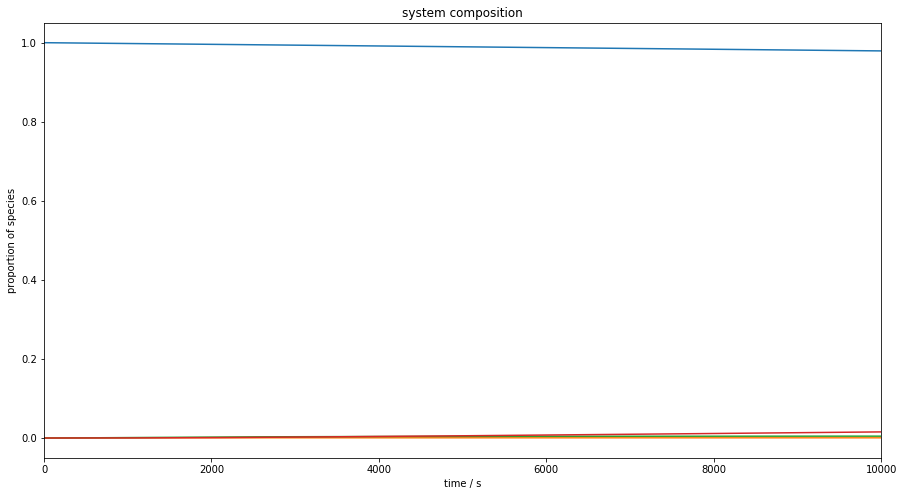

In [33]:
# Visualize the resulting change in population.
times = np.linspace( 0,nt*dt,nt )
mpl.rcParams[ 'figure.figsize' ] = (15,8)  # resize the figure for viewing convenience
plt.plot( times,N.T )
plt.xlim( ( min( times ),max( times ) ) )
plt.ylabel( 'proportion of species' )
plt.xlabel( 'time / s' )
plt.title( 'system composition' )
plt.show()
mpl.rcParams[ 'figure.figsize' ] = (15,3)  # reset the figure size to what it was before

# Before you submit...

### Submission [15 points]
Make sure that you have filled your name and studentID as well as answered all questions.

Save this file as lab08-studentID.ipynb then UPLOAD to RELATE!

##  References

-   ["General solution of Bateman equations for nuclear transmutations"](http://www.sciencedirect.com/science/article/pii/S0306454906000284)
-   ["Simulating radioactive decay chains with spreadsheets"](http://wordpress.mrreid.org/wp-content/uploads/2011/07/simulating-radioactive-decay-chains-with-spreadsheets.pdf)